In [6]:
#load eda pkgs
import pandas as pd
import numpy as np

In [7]:
#Load data viz pkgs
import seaborn as sns

In [8]:
#Load test cleaning pkgs
import neattext.functions as nfx

In [9]:
# Load ML Pkgs
# Estimators
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Transformers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix


In [25]:

df = pd.read_csv(r"C:\Users\Isha Sharma\Downloads\Emotion_final.csv.zip")


In [26]:
df.head()

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [27]:
df['Emotion'].value_counts()

happy       7029
sadness     6265
anger       2993
fear        2652
love        1641
surprise     879
Name: Emotion, dtype: int64

<AxesSubplot:xlabel='Emotion', ylabel='count'>

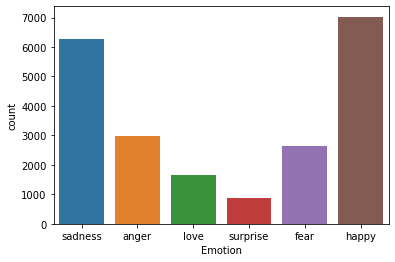

In [28]:
sns.countplot(x='Emotion' ,data=df)

In [29]:
#Data Cleaning
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [30]:
#User handles
df['Clean_Text'] = df['Text'].apply(nfx.remove_userhandles)

In [31]:
#Stopwords
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)

In [32]:
df

,Text,Emotion,Clean_Text
0,i didnt feel humiliated,sadness,didnt feel humiliated
1,i can go from feeling so hopeless to so damned...,sadness,feeling hopeless damned hopeful cares awake
2,im grabbing a minute to post i feel greedy wrong,anger,im grabbing minute post feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,love,feeling nostalgic fireplace know property
4,i am feeling grouchy,anger,feeling grouchy
...,...,...,...
21454,Melissa stared at her friend in dism,fear,Melissa stared friend dism
21455,Successive state elections have seen the gover...,fear,Successive state elections seen governing part...
21456,Vincent was irritated but not dismay,fear,Vincent irritated dismay
21457,Kendall-Hume turned back to face the dismayed ...,fear,Kendall-Hume turned face dismayed coup


In [33]:
#Features & Labels
Xfeatures = df['Clean_Text']
ylabels = df['Emotion']


In [35]:
#Split Data
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.3,random_state=42)


In [36]:
#Build Pipeline
from sklearn.pipeline import Pipeline

In [39]:
#LogisticRegression Pipeline
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])

In [40]:
#Train and fit data
pipe_lr.fit(x_train,y_train)

C:\isha files\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [41]:
pipe_lr

Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [45]:
pipe_lr.score(x_test,y_test)

0.8884746815781298

In [46]:
ex1 = "This book was so interesting it made me happy"

In [47]:
#Prediction Prob
pipe_lr.predict([ex1])

array(['happy'], dtype=object)

In [48]:
#Prediction Prob
pipe_lr.predict_proba([ex1])

array([[0.07048885, 0.03479202, 0.73268606, 0.0218074 , 0.11443831,
        0.02578736]])

In [49]:
#TO know the classes
pipe_lr.classes_

array(['anger', 'fear', 'happy', 'love', 'sadness', 'surprise'],
      dtype=object)

In [54]:
#Save Model & Pipeline
import joblib
pipeline_file = open("emotion_classifier_pipe_lr_03_june_2021.pkl","wb")
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()